In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy = pd.merge(study_results, mouse_metadata, on=(["Mouse ID", "Mouse ID"]))

# Display the data table for preview
mousestudy.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checks the number of mice.
mice = mousestudy["Mouse ID"].unique()
numbermice = len(mice)
numbermice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Get all the data for the duplicate mouse ID. 
badmouse = mousestudy.loc[mousestudy["Mouse ID"] == "g989"]
badmouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Creates a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedmouse = mousestudy.loc[mousestudy["Mouse ID"] != 'g989']
cleanedmouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mice = cleanedmouse["Mouse ID"].unique()
numbermice = len(mice)
numbermice

248

## Summary Statistics

In [7]:
# Groups mice by the drug that they were given
druggrouping = cleanedmouse.groupby("Drug Regimen")

# Pulls out the mean of the tumor volume for each respective drug
tumormean = druggrouping["Tumor Volume (mm3)"].mean()

# Pulls out the median of the tumor volume for each respective drug
tumormedian = druggrouping["Tumor Volume (mm3)"].median()

# Pulls out the variance of the tumor volume for each respective drug
tumorvar = druggrouping["Tumor Volume (mm3)"].var()

# Pulls out the standard deviation of the tumor volume for each respective drug
tumorstddev = druggrouping["Tumor Volume (mm3)"].std()

# Pulls out the SEM of the tumor volume for each respective drug
tumorsem = druggrouping["Tumor Volume (mm3)"].sem()

# Places all the series generated above into a dataframe and displays the results
drugsummary = pd.DataFrame({
    "Mean Tumor Volume": tumormean, "Median Tumor Volume": tumormedian, "Tumor Volume Variance": tumorvar,
    "Tumor Volume Std. Dev.": tumorstddev, "Tumor Volume Std. Err.": tumorsem
})
drugsummary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Creates the same dataframe as above using the agg method
drugsummaryv2 = druggrouping["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drugsummaryv2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

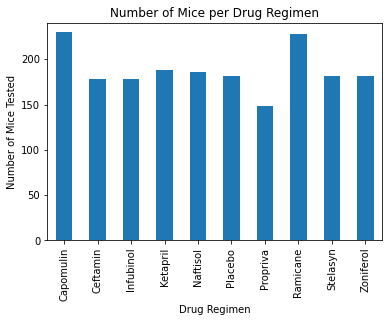

In [9]:
# Creates a series of data counting the number of mice on each drug regimen
timepoints = druggrouping["Timepoint"].count()

# Creates a bar graph using Pandas displaying the series created above
timepoints.plot(kind="bar", title="Number of Mice per Drug Regimen", ylabel="Number of Mice Tested", 
               ylim=(0, max(timepoints)+10))

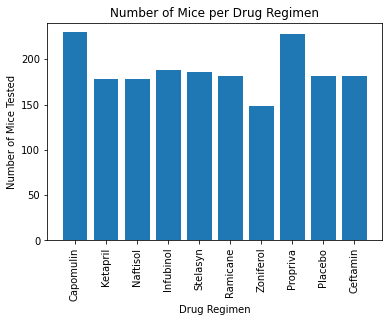

In [10]:
# Pulls the name of the drugs into an array
x_axis = cleanedmouse["Drug Regimen"].unique()

# Plots the number of mice in each drug regimen using pyplot
plt.bar(x_axis, timepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Drug Regimen")
plt.xticks(rotation=90)
plt.ylim(0, max(timepoints)+10)
plt.show()

<AxesSubplot:title={'center':'Percentage of Each Gender of Mice'}, ylabel='Sex'>

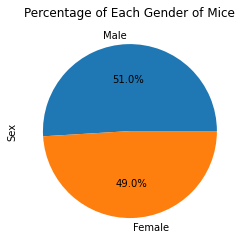

In [11]:
# Creates a series of data counting the number of male and female mice
micegender = cleanedmouse["Sex"].value_counts()

# Creates a pie chart using pandas displaying the data from the series above
micegender.plot(kind="pie", title="Percentage of Each Gender of Mice", autopct="%1.1f%%")

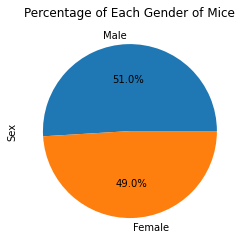

In [12]:
# Pulls an array of the genders for the mice
labels = cleanedmouse["Sex"].unique()

# Flips the array to match the data to the appropriate gender
labels = labels[::-1]

# Creates a pie chart for the percentage of each gender of mouse using pyplot
plt.pie(micegender, labels=labels, autopct="%1.1f%%")
plt.title("Percentage of Each Gender of Mice")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
